In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
data =  pd.read_csv("/content/drive/MyDrive/Colab Notebooks/globalterrorismdb_0718dist.csv",encoding="latin1")

<ipython-input-13-49ff47a6e2f0>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data =  pd.read_csv("/content/drive/MyDrive/Colab Notebooks/globalterrorismdb_0718dist.csv",encoding="latin1")


In [14]:
df=pd.DataFrame(data)
print("Data has been succesfully imported")
df.head()

Data has been succesfully imported


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [16]:
df.shape


(181691, 135)

In [17]:
df.columns


Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [20]:
for i in df.columns:
  print(i,end=" , ")

eventid , iyear , imonth , iday , approxdate , extended , resolution , country , country_txt , region , region_txt , provstate , city , latitude , longitude , specificity , vicinity , location , summary , crit1 , crit2 , crit3 , doubtterr , alternative , alternative_txt , multiple , success , suicide , attacktype1 , attacktype1_txt , attacktype2 , attacktype2_txt , attacktype3 , attacktype3_txt , targtype1 , targtype1_txt , targsubtype1 , targsubtype1_txt , corp1 , target1 , natlty1 , natlty1_txt , targtype2 , targtype2_txt , targsubtype2 , targsubtype2_txt , corp2 , target2 , natlty2 , natlty2_txt , targtype3 , targtype3_txt , targsubtype3 , targsubtype3_txt , corp3 , target3 , natlty3 , natlty3_txt , gname , gsubname , gname2 , gsubname2 , gname3 , gsubname3 , motive , guncertain1 , guncertain2 , guncertain3 , individual , nperps , nperpcap , claimed , claimmode , claimmode_txt , claim2 , claimmode2 , claimmode2_txt , claim3 , claimmode3 , claimmode3_txt , compclaim , weaptype1 , wea

In [23]:
df=df[["iyear","imonth","iday","country_txt","region_txt","provstate","city","latitude","longitude","location","summary","attacktype1_txt","gname","motive","nkill","nwound","addnotes"]]
df.head()


,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,gname,motive,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,MANO-D,NaN,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),23rd of September Communist League,NaN,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Unknown,NaN,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Unknown,NaN,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Unknown,NaN,NaN,NaN,NaN


In [27]:
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country","region_txt":"Region","provstate":"State","city":"City","latitude":"Latitude","attacktype1_txt":"AttackType","nkill":"Killed","nwound":"Wounded"},inplace=True)

In [28]:
df.head()

,Year,Month,Day,Country,Region,State,City,Latitude,longitude,location,summary,AttackType,gname,motive,Killed,Wounded,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,MANO-D,NaN,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),23rd of September Communist League,NaN,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Unknown,NaN,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Unknown,NaN,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Unknown,NaN,NaN,NaN,NaN


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   Day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   Region      181691 non-null  object 
 5   State       181270 non-null  object 
 6   City        181257 non-null  object 
 7   Latitude    177135 non-null  float64
 8   longitude   177134 non-null  float64
 9   location    55495 non-null   object 
 10  summary     115562 non-null  object 
 11  AttackType  181691 non-null  object 
 12  gname       181691 non-null  object 
 13  motive      50561 non-null   object 
 14  Killed      171378 non-null  float64
 15  Wounded     165380 non-null  float64
 16  addnotes    28289 non-null   object 
dtypes: float64(4), int64(3), object(10)
memory usage: 23.6+ MB


In [30]:
df.shape


(181691, 17)

In [31]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
State            421
City             434
Latitude        4556
longitude       4557
location      126196
summary        66129
AttackType         0
gname              0
motive        131130
Killed         10313
Wounded        16311
addnotes      153402
dtype: int64

In [33]:
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casuality"]=df["Killed"]+df["Wounded"]

In [34]:
df.describe()

,Year,Month,Day,Latitude,longitude,Killed,Wounded,Casuality
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


# VISUALIZATION OF DATA

YEARWISE ATTACKS

In [36]:
attacks=df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attack"}).set_index("Year")

In [37]:
attacks.head()

,Attack
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


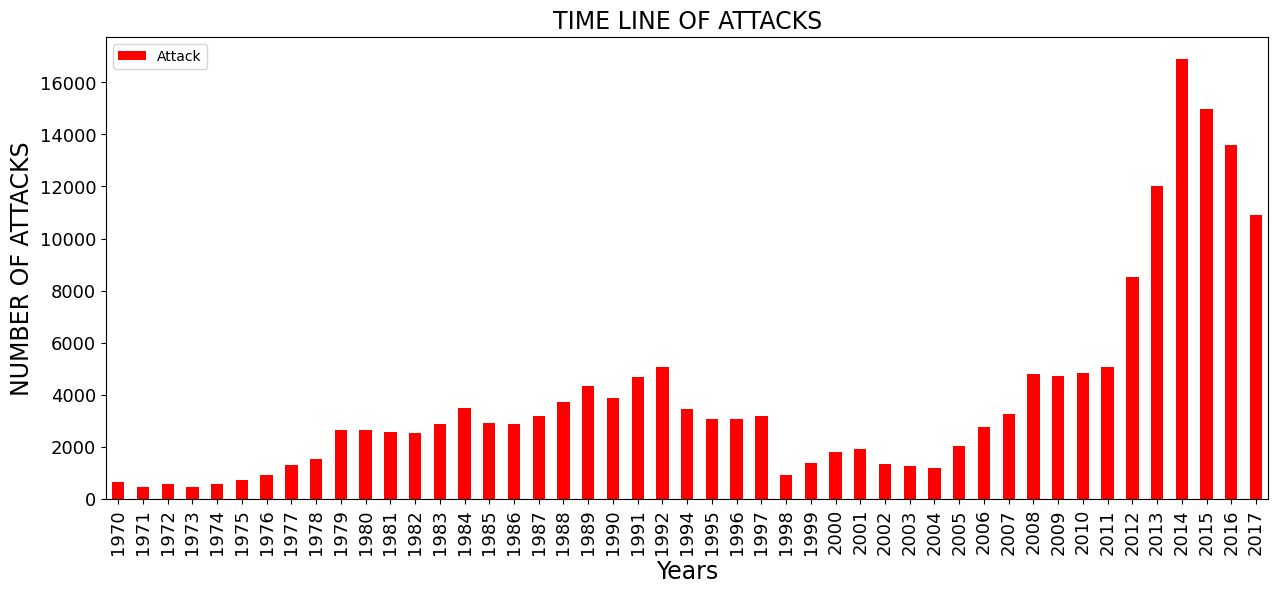

In [39]:
attacks.plot(kind="bar",color="red",figsize=(15,6),fontsize=13)
plt.title("TIME LINE OF ATTACKS",fontsize=17)
plt.xlabel("Years",fontsize=17)
plt.ylabel("NUMBER OF ATTACKS",fontsize=17)
plt.show()

In [40]:
yc=df[["Year","Casuality"]].groupby("Year").sum()
yc.head()


,Casuality
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


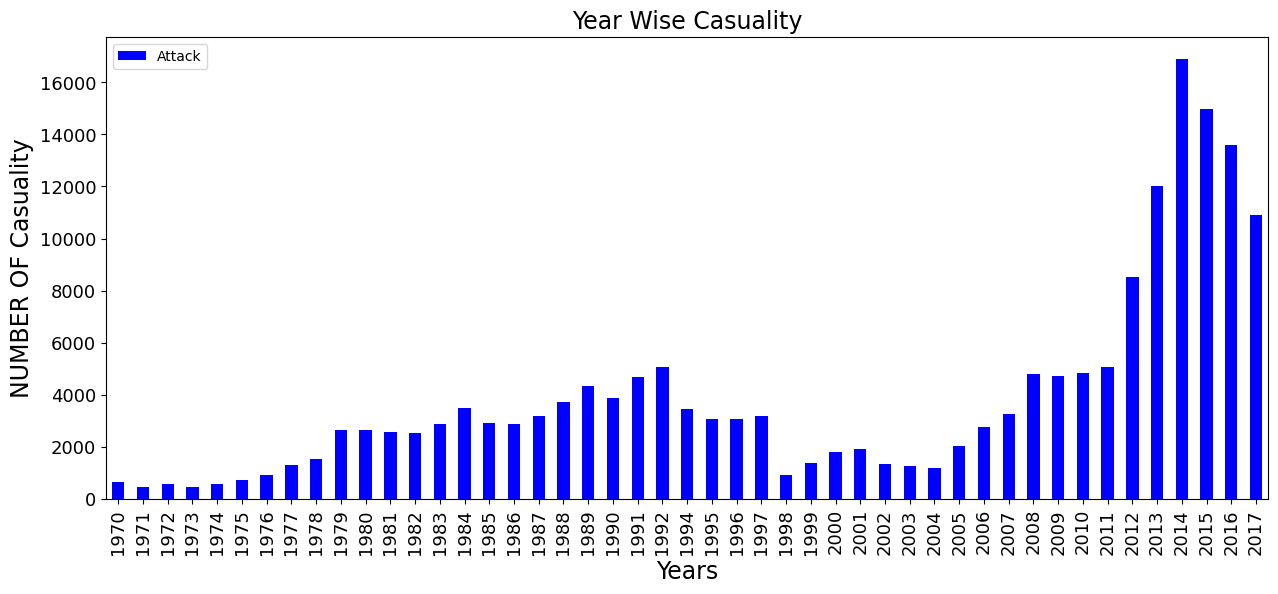

In [43]:
attacks.plot(kind="bar",color="blue",figsize=(15,6),fontsize=13)
plt.title("Year Wise Casuality",fontsize=17)
plt.xlabel("Years",fontsize=17)
plt.ylabel("NUMBER OF Casuality",fontsize=17)
plt.show()

Region wise Attacks

In [44]:
reg=pd.crosstab(df.Year,df.Region)
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


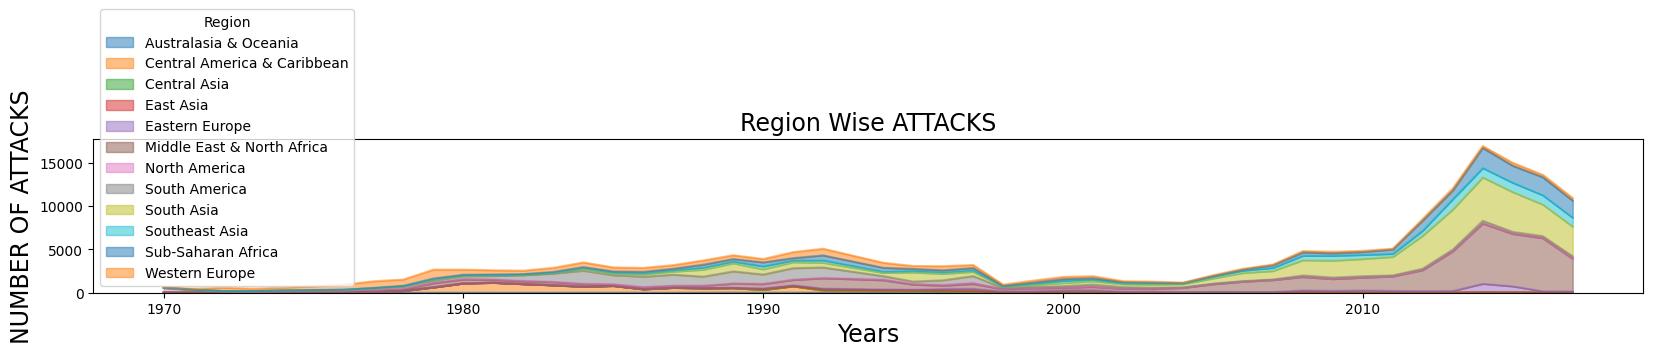

In [45]:
reg.plot(kind="area",stacked="false",alpha=0.5,figsize=(20,2),)
plt.title("Region Wise ATTACKS",fontsize=17)
plt.xlabel("Years",fontsize=17)
plt.ylabel("NUMBER OF ATTACKS",fontsize=17)
plt.show()

Total Casuality (Killed+Wounded) in each region

In [46]:
rc=df[["Region","Casuality"]].groupby("Region").sum().sort_values(by="Casuality",ascending=False)
rc.head()

,Casuality
Region,
Middle East & North Africa,351950.0
South Asia,242679.0
Sub-Saharan Africa,131243.0
South America,45553.0
Southeast Asia,41896.0


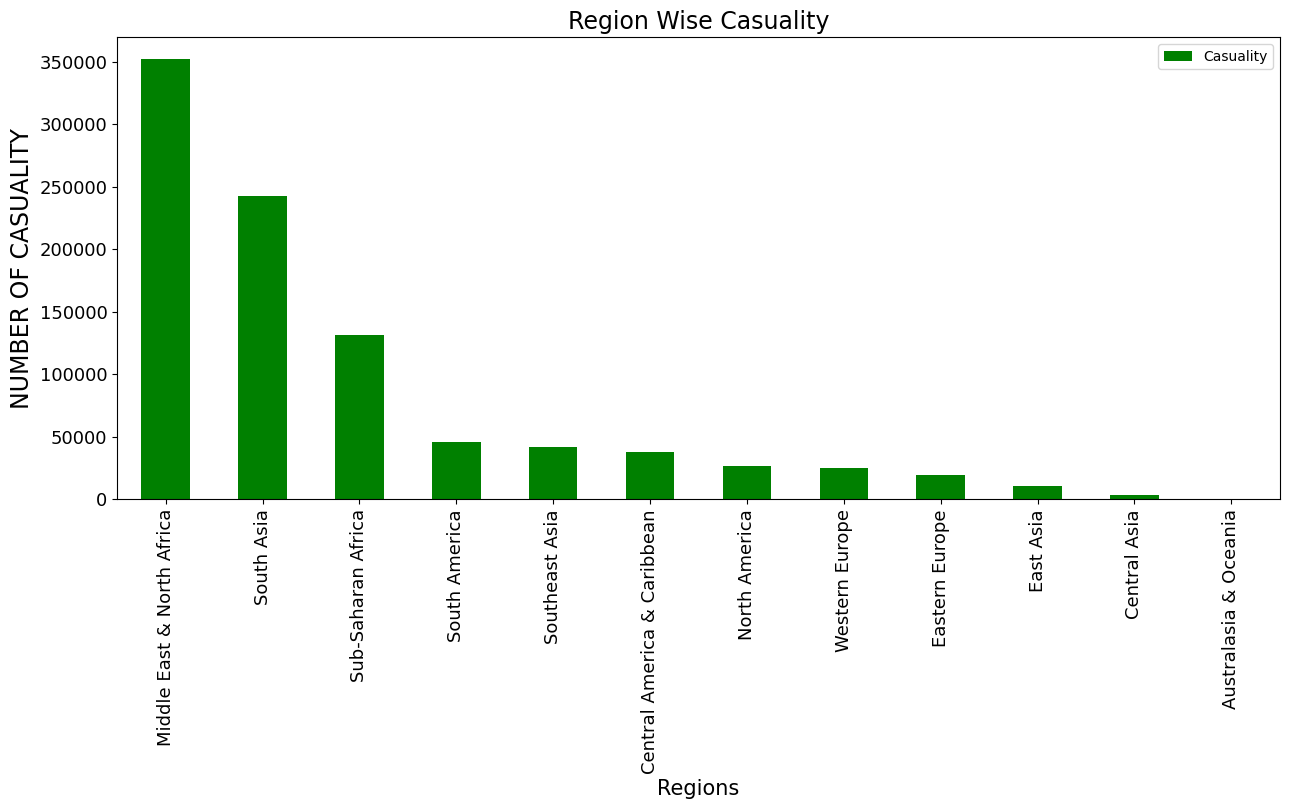

In [48]:
rc.plot(kind="bar",color="green",figsize=(15,6),fontsize=13)
plt.title("Region Wise Casuality",fontsize=17)
plt.xlabel("Regions",fontsize=15)
plt.ylabel("NUMBER OF CASUALITY",fontsize=17)
plt.show()

Country Wise Attacks

In [50]:
ct=df["Country"].value_counts().head(10)
ct

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

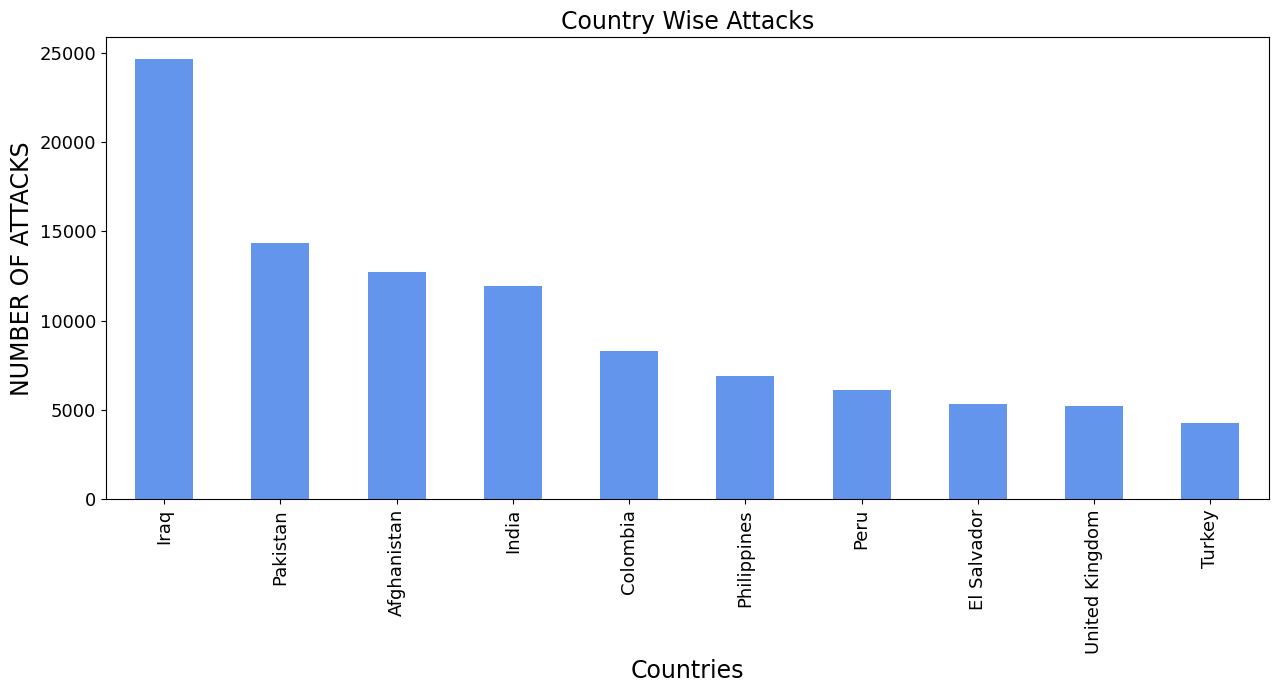

In [51]:
ct.plot(kind="bar",color="cornflowerblue",figsize=(15,6),fontsize=13)
plt.title("Country Wise Attacks",fontsize=17)
plt.xlabel("Countries",fontsize=17)
plt.ylabel("NUMBER OF ATTACKS",fontsize=17)
plt.show()

In [54]:
cnc=df[["Country","Casuality"]].groupby("Country").sum().sort_values(by="Casuality",ascending=False)
cnc.head(10)

,Casuality
Country,
Iraq,213279.0
Afghanistan,83661.0
Pakistan,65860.0
India,48321.0
Nigeria,32921.0
Sri Lanka,31091.0
Syria,29338.0
Colombia,25026.0
United States,24473.0


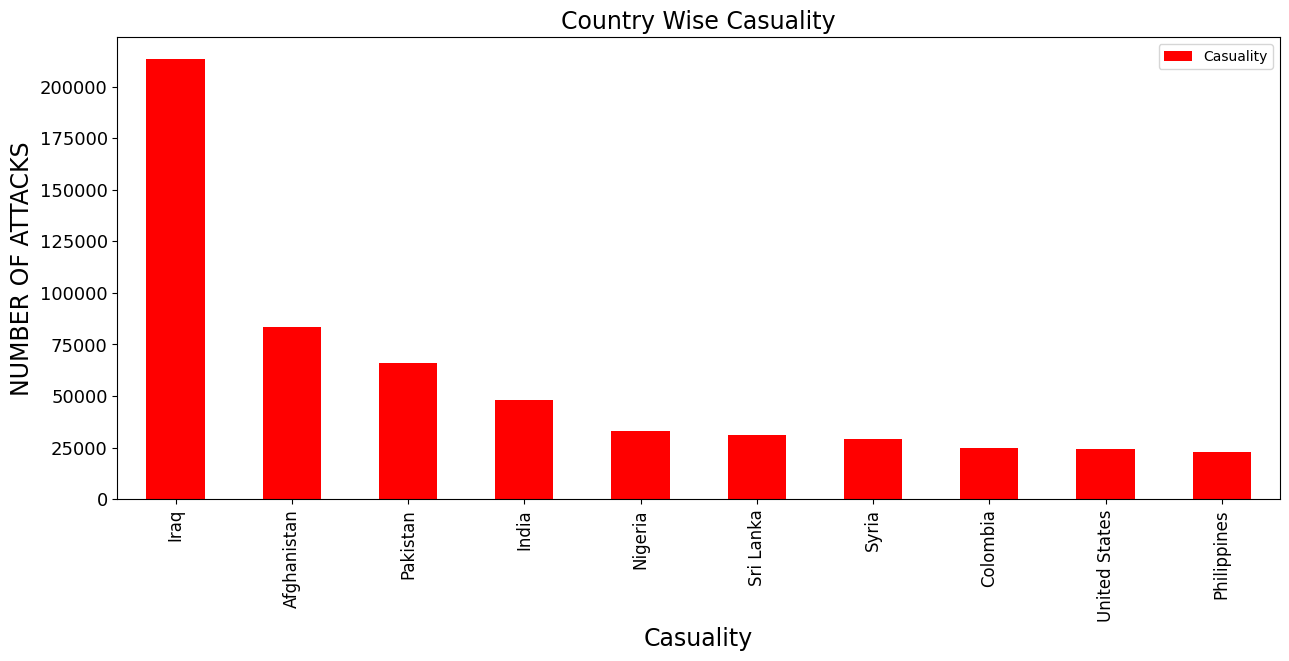

In [56]:
cnc[:10].plot(kind="bar",color="red",figsize=(15,6),fontsize=13)
plt.title("Country Wise Casuality",fontsize=17)
plt.xlabel("Casuality",fontsize=17)
plt.xticks(fontsize=12)
plt.ylabel("NUMBER OF ATTACKS",fontsize=17)
plt.show()

Killed in each Country

In [60]:
cnk=df[["Country","Killed"]].groupby("Country").sum().sort_values(by="Killed",ascending=False)
cnk.head(10)

,Killed
Country,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0
Sri Lanka,15530.0
Syria,15229.0
Colombia,14698.0
Peru,12771.0


In [61]:
cnw=df[["Country","Wounded"]].groupby("Country").sum().sort_values(by="Country",ascending=False)
cnw.head(10)

,Wounded
Country,
Zimbabwe,222.0
Zambia,62.0
Zaire,211.0
Yugoslavia,281.0
Yemen,9328.0
Western Sahara,4.0
West Germany (FRG),862.0
West Bank and Gaza Strip,3014.0
Wallis and Futuna,0.0


Text(0, 0.5, 'NUMBER of People Wounded')

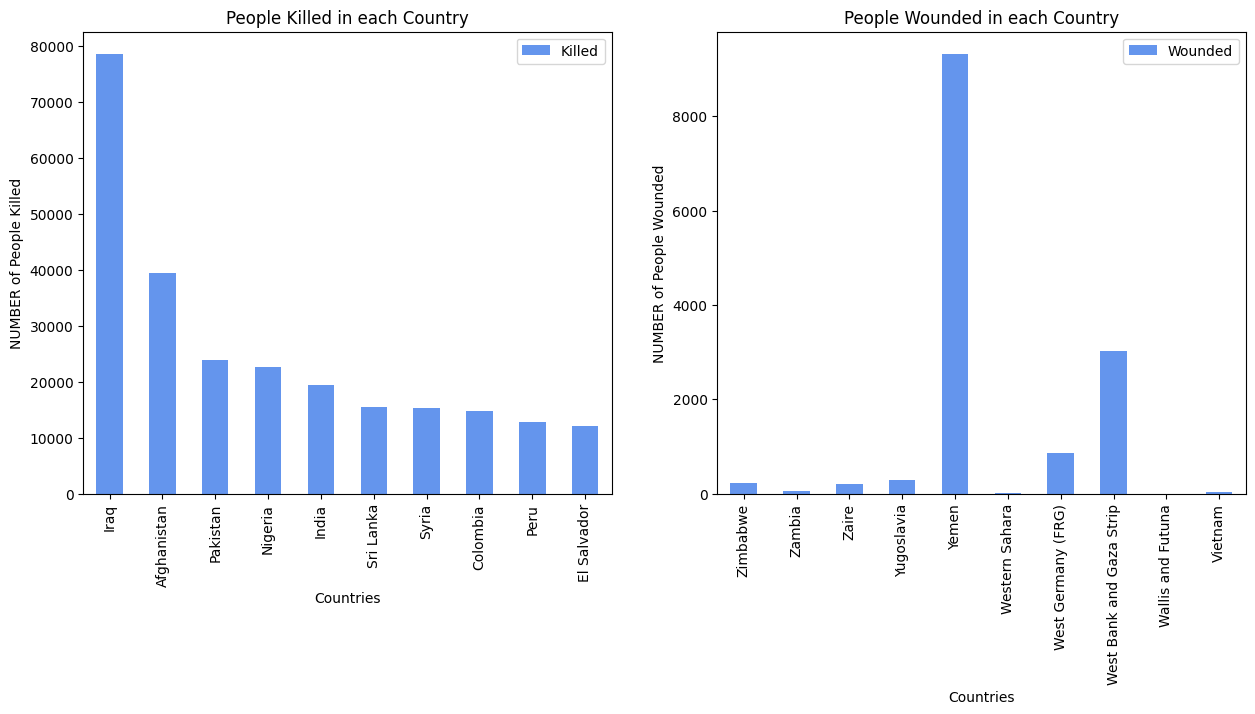

In [62]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#killed
cnk[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Country")
ax0.set_xlabel("Countries")
ax0.set_ylabel("NUMBER of People Killed")

#wounded
cnw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Country")
ax1.set_xlabel("Countries")
ax1.set_ylabel("NUMBER of People Wounded")

In [65]:
city=df["City"].value_counts()[1:11]
city

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: City, dtype: int64

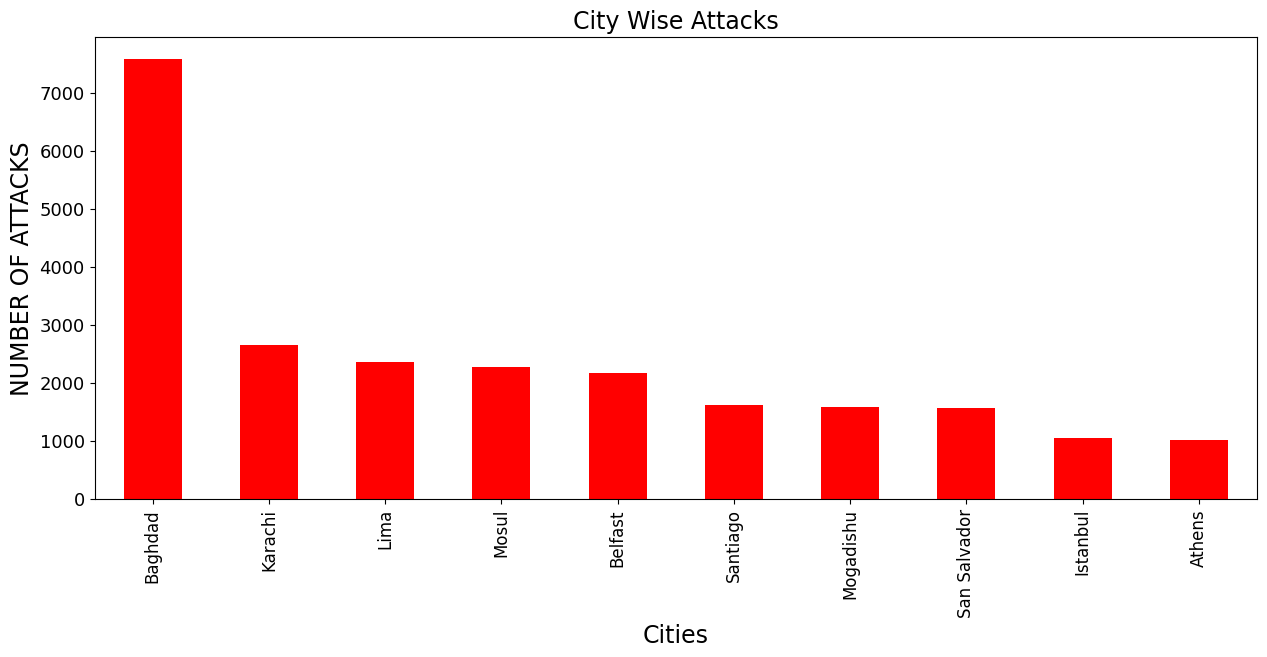

In [66]:
city.plot(kind="bar",color="red",figsize=(15,6),fontsize=13)
plt.title("City Wise Attacks",fontsize=17)
plt.xlabel("Cities",fontsize=17)
plt.xticks(fontsize=12)
plt.ylabel("NUMBER OF ATTACKS",fontsize=17)
plt.show()

Total Caualities(Killed + Wounded) in each city

In [70]:
cc=df[["City","Casuality"]].groupby("City").sum().sort_values(by="Casuality",ascending=False).drop("Unknown")
cc.head(10)

,Casuality
City,
Baghdad,77876.0
New York City,19619.0
Mosul,12927.0
Karachi,9376.0
Mogadishu,8868.0
Kabul,8466.0
Beirut,7257.0
Kirkuk,6636.0
Colombo,5906.0


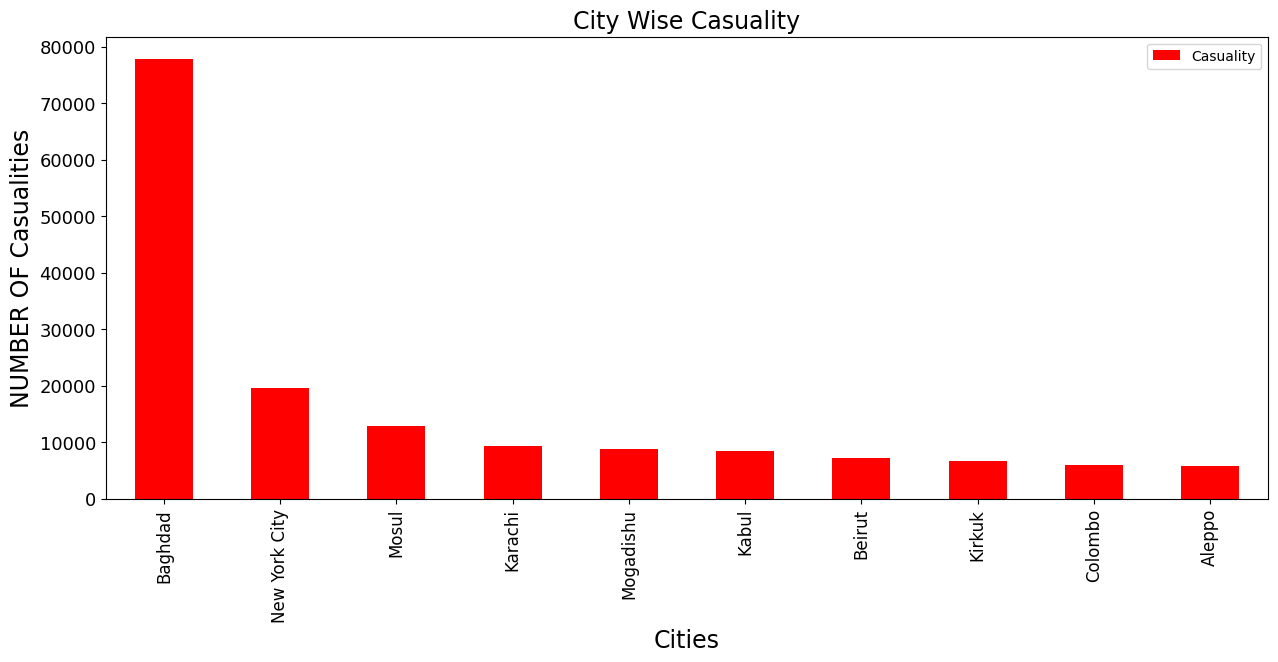

In [71]:
cc[:10].plot(kind="bar",color="red",figsize=(15,6),fontsize=13)
plt.title("City Wise Casuality",fontsize=17)
plt.xlabel("Cities",fontsize=17)
plt.xticks(fontsize=12)
plt.ylabel("NUMBER OF Casualities",fontsize=17)
plt.show()

Killed in each City

In [74]:
ck=df[["City","Killed"]].groupby("City").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
ck.head(10)

,Killed
City,
Baghdad,21151.0
Mosul,7140.0
Mogadishu,3913.0
Karachi,3688.0
New York City,2838.0
Tikrit,2679.0
Kabul,2493.0
Ramadi,2313.0
Maiduguri,2235.0


In [75]:
cw=df[["City","Wounded"]].groupby("City").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
cw.head(10)

,Wounded
City,
Baghdad,56725.0
New York City,16781.0
Kabul,5973.0
Mosul,5787.0
Karachi,5688.0
Tokyo,5542.0
Beirut,5341.0
Nairobi,5024.0
Kirkuk,5008.0


Text(0, 0.5, 'NUMBER of People Wounded')

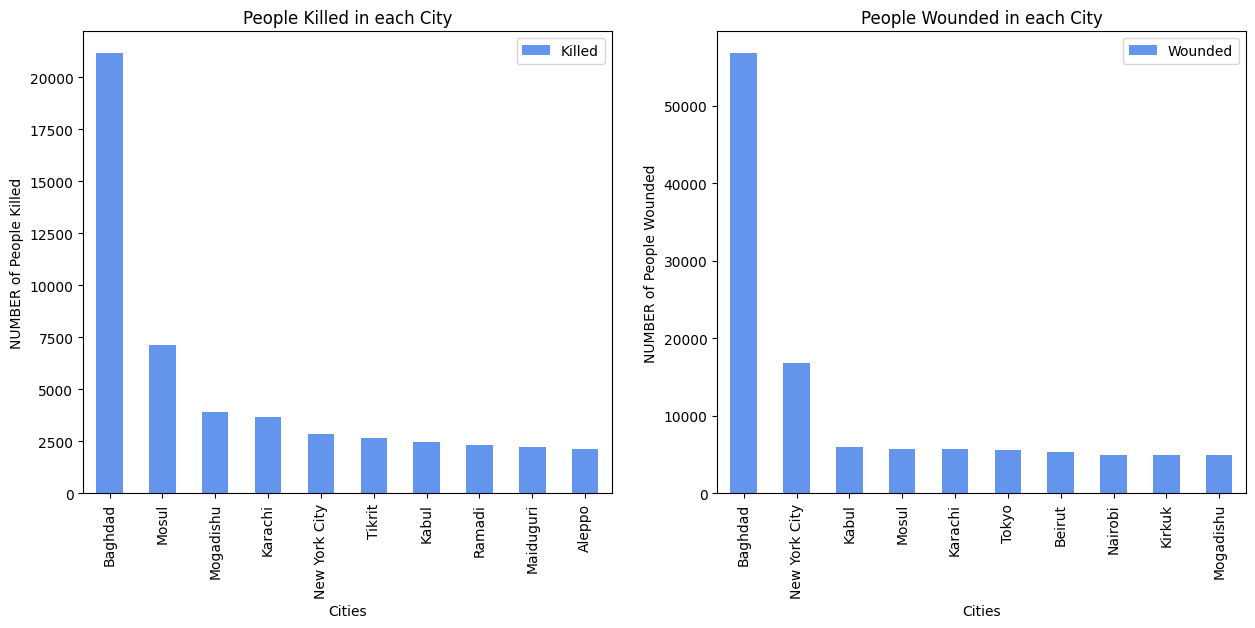

In [76]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#killed
ck[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each City")
ax0.set_xlabel("Cities")
ax0.set_ylabel("NUMBER of People Killed")

#wounded
cw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each City")
ax1.set_xlabel("Cities")
ax1.set_ylabel("NUMBER of People Wounded")

Terrorist Group Wise Attacks_top10

In [79]:
grp=df["gname"].value_counts()[1:10]
grp

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: gname, dtype: int64

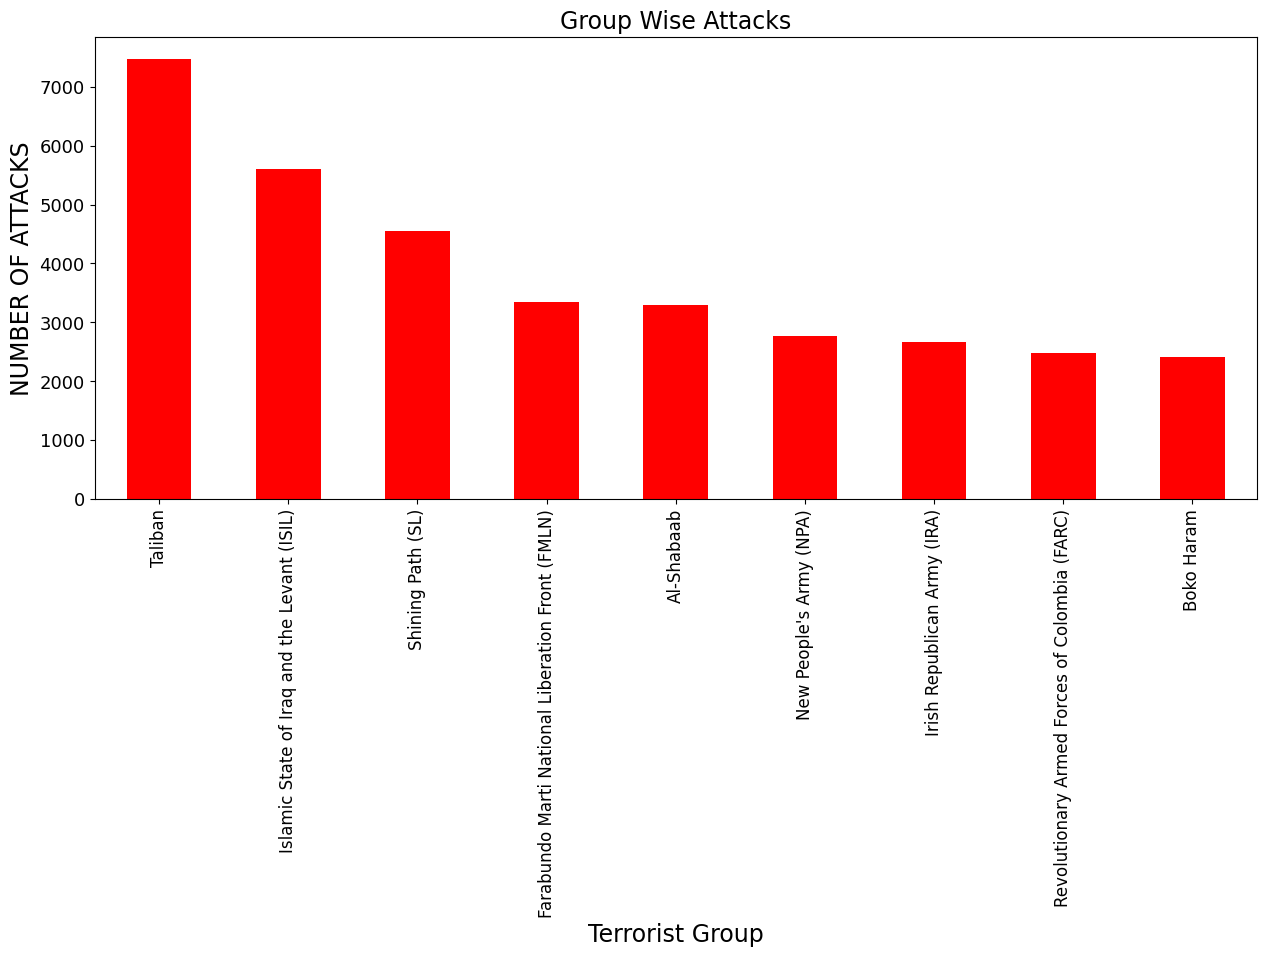

In [80]:
grp.plot(kind="bar",color="red",figsize=(15,6),fontsize=13)
plt.title("Group Wise Attacks",fontsize=17)
plt.xlabel("Terrorist Group",fontsize=17)
plt.xticks(fontsize=12)
plt.ylabel("NUMBER OF ATTACKS",fontsize=17)
plt.show()

Casuality

In [81]:
gc=df[["gname","Casuality"]].groupby("gname").sum().sort_values(by="Casuality",ascending=False).drop("Unknown")
gc.head(10)

,Casuality
gname,
Islamic State of Iraq and the Levant (ISIL),69595.0
Taliban,57342.0
Boko Haram,29801.0
Al-Qaida,28372.0
Liberation Tigers of Tamil Eelam (LTTE),22020.0
Al-Shabaab,16954.0
Tehrik-i-Taliban Pakistan (TTP),15574.0
Al-Qaida in Iraq,14724.0
Shining Path (SL),14632.0


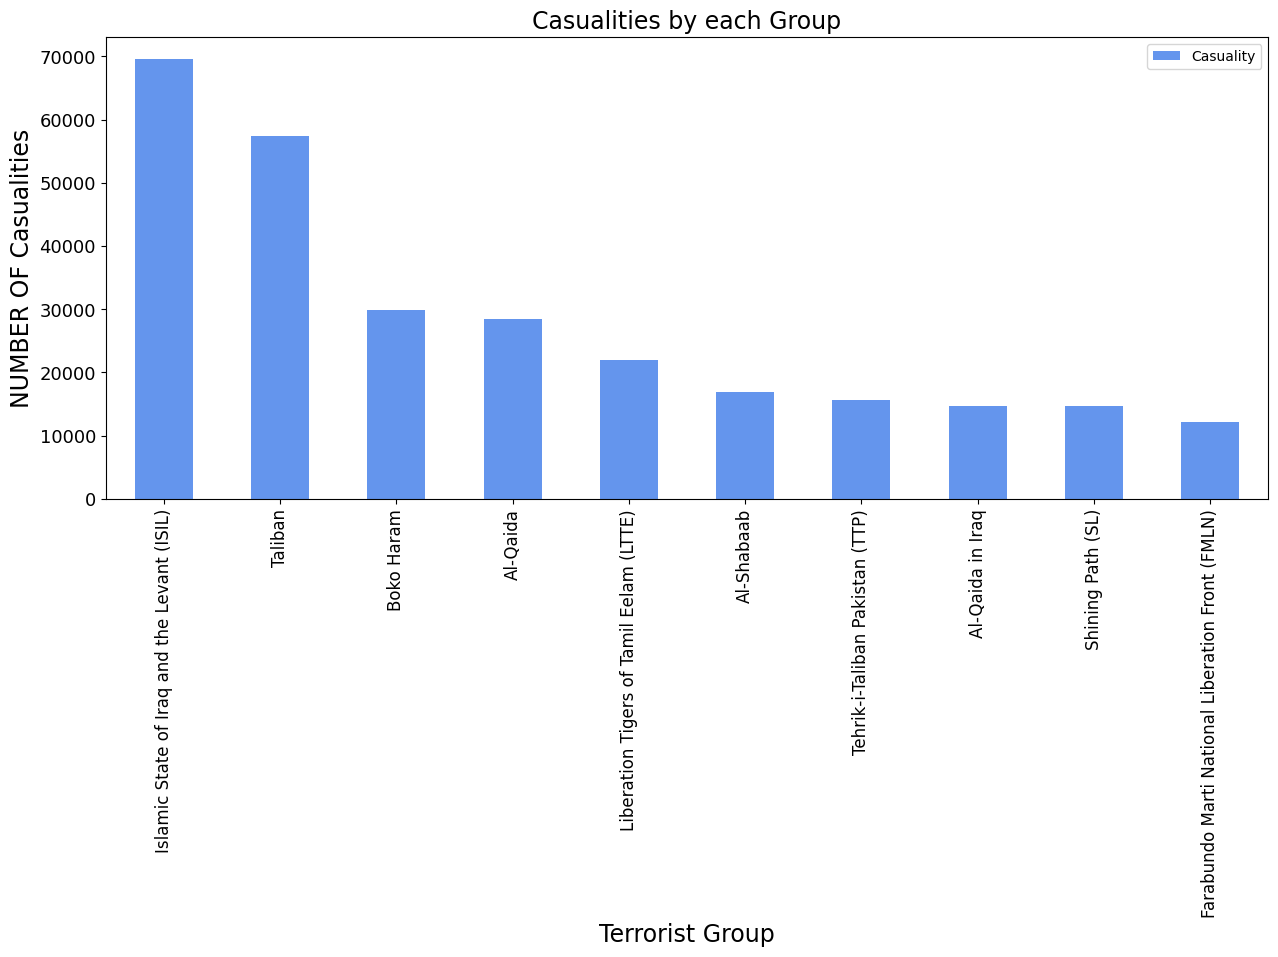

In [82]:
gc.head(10).plot(kind="bar",color="cornflowerblue",figsize=(15,6),fontsize=13)
plt.title("Casualities by each Group",fontsize=17)
plt.xlabel("Terrorist Group",fontsize=17)
plt.xticks(fontsize=12)
plt.ylabel("NUMBER OF Casualities",fontsize=17)
plt.show()

Killed by Each Group

In [83]:
gk=df[["gname","Killed"]].groupby("gname").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
gk.head(10)

,Killed
gname,
Islamic State of Iraq and the Levant (ISIL),38923.0
Taliban,29410.0
Boko Haram,20328.0
Shining Path (SL),11601.0
Liberation Tigers of Tamil Eelam (LTTE),10989.0
Al-Shabaab,9330.0
Farabundo Marti National Liberation Front (FMLN),8065.0
Nicaraguan Democratic Force (FDN),6662.0
Tehrik-i-Taliban Pakistan (TTP),6042.0
